# Machine Learning Metrics

## Determining Model Accuracy

It's very common to train a variety of models, apply each to held out sample and
score the results. Sometimes, a third hold set is used to test a model on
_completely_ new data. Typically, these 2 hold out sets are called the
_validation_ and _test_ sets respectively. In order to evaluate a model, a
suitable metric for the dataset needs to be selected.

Datasets with rare occurring labellings can produce misleading model performance
if a less nuanced metric is chosen to measure it.

 The following are some definitions to help us better understand
these metrics:

- True Positive (TP): True positive represents the value of correct predictions of positives out of actual positive cases.
- False Positive (FP): False positive represents the value of incorrect positive predictions.
- True Negative (TN): True negative represents the value of correct predictions of negatives out of actual negative cases.
- False Negative (FN): False negative represents the value of incorrect negative predictions.

### Accuracy

Simple accuracy is the measure of how many discrete labellings by a classifier
(or regressor) were correct.

*Accuracy Score = (TP + TN) / (TP + FN + TN + FP)*

In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Simple synthetic data
training_points = [[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]
training_labels = [1, 1, 1, 2, 2, 2]
X = np.array(training_points)
Y = np.array(training_labels)

# Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X, Y)

# Classify test data with the classifier
test_points = [[1, 1], [2, 2], [3, 3], [4, 3]]
test_labels = [2, 2, 2, 1]
predicts = gnb.predict(test_points)

count = len([True for idx, label in enumerate(test_labels) if label == predicts[idx]])
print("Accuracy Rate (manually calculated): %f" % (float(count) / len(test_labels)))
print("Accuracy Rate (via accuracy_score()): %f" % accuracy_score(test_labels, predicts))

Accuracy Rate (manually calculated): 0.750000
Accuracy Rate (via accuracy_score()): 0.750000


### What about accuracy and cross validation?


In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5)
result = cross_val_score(gnb , X, Y, cv = kf)
print(result)
print("Avg accuracy: {}".format(result.mean()))

[0. 0. 1. 1. 0.]
Avg accuracy: 0.4


### Recall, Precision and F-Measure, Oh My!

To better understand your model's effectiveness use the Recall, Precision and
F-Measure metrics.

_Recall_ is the measure of how many correct labellings your model predicted. It
is defined as: *Recall Score = TP / (FN + TP)*
_Precision_ is the measure of how many incorrect labellings your model predicted.
*Precision Score = TP / (FP + TP)*
_F-measure_ is something like an average of the two scores.
*F1 Score = 2 * Precision Score * Recall Score / (Precision Score + Recall Score)*


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split

bc = datasets.load_breast_cancer()
X = bc.data
Y = bc.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# train the support vector machine
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Recall: 0.972
Precision: 0.972
Accuracy: 0.965
F1 Score: 0.972



### Confusion Matrix

A confusion matrix is a standard way to graph TP, TN, FP, FN is a 2x2 matrix,
resulting in a nice quadrant display of the results.

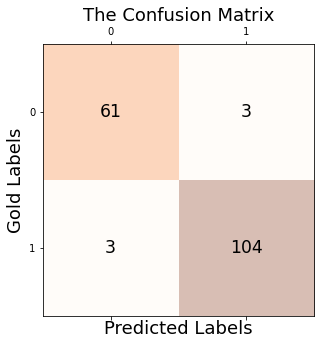

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predicted Labels', fontsize=18)
plt.ylabel('Gold Labels', fontsize=18)
plt.title('The Confusion Matrix', fontsize=18)
plt.show()
